## import the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## read and get a general description of the data

In [2]:
cellphones = pd.read_csv("/home/user/Downloads/cellphones/cellphones.csv")
print(cellphones.head())
print(cellphones.info())

   user_id  age  gender           occupation  cellphone_id  rating     brand  \
0        0   38  Female         Data analyst            30       1  Motorola   
1       16   31  Female                sales            30       2  Motorola   
2       25   27  Female          Team leader            30       5  Motorola   
3       32   39    Male  QA Software Manager            30       1  Motorola   
4       33   30  Female           Healthcare            30      10  Motorola   

                model operating system  internal memory  RAM  performance  \
0  Moto G Play (2021)          Android               32    3         1.42   
1  Moto G Play (2021)          Android               32    3         1.42   
2  Moto G Play (2021)          Android               32    3         1.42   
3  Moto G Play (2021)          Android               32    3         1.42   
4  Moto G Play (2021)          Android               32    3         1.42   

   main camera  selfie camera  battery size  screen size

## Qn1: Order the brands according to the number of users


In [3]:
brand_reach = cellphones.groupby("brand")["user_id"].count().sort_values(ascending=False).reset_index(name="count")
print(brand_reach)

      brand  count
0   Samsung    237
1     Apple    165
2    Xiaomi    135
3  Motorola    132
4   OnePlus    112
5    Google     99
6      Asus     30
7      Oppo     30
8      Sony     26
9      Vivo     24


Text(0.5, 1.0, 'Phones and The Distribution of Users')

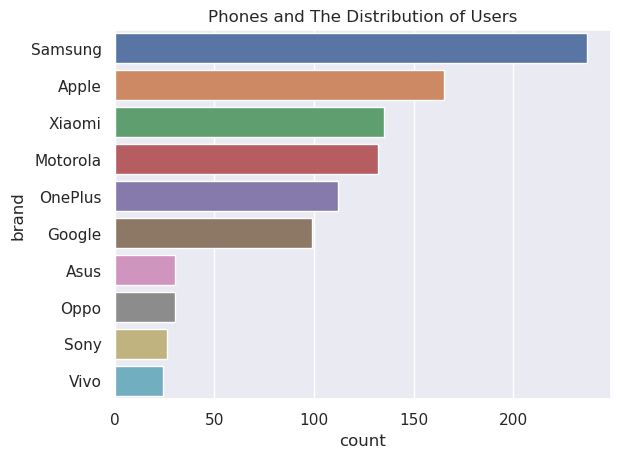

In [4]:
# plot 
sns.set()
sns.barplot(data=brand_reach, x="count", y="brand")
plt.title("Phones and The Distribution of Users")

From the horizontal bar graph above, we can see that the Samsung brand has the largest number of users in this data.

## Qn2: The distribution of each brand across genders

In [5]:
gender = cellphones.groupby("gender")["gender"].count()
print("The gender distribution is made up of:", gender)
gender_reach = cellphones.groupby("brand")["gender"].value_counts().reset_index(name="count")
print(gender_reach)

The gender distribution is made up of: gender
-Select Gender-     30
Female             460
Male               500
Name: gender, dtype: int64
       brand           gender  count
0      Apple             Male     82
1      Apple           Female     75
2      Apple  -Select Gender-      8
3       Asus             Male     17
4       Asus           Female     13
5     Google             Male     55
6     Google           Female     41
7     Google  -Select Gender-      3
8   Motorola             Male     65
9   Motorola           Female     61
10  Motorola  -Select Gender-      6
11   OnePlus           Female     60
12   OnePlus             Male     51
13   OnePlus  -Select Gender-      1
14      Oppo             Male     18
15      Oppo           Female     11
16      Oppo  -Select Gender-      1
17   Samsung             Male    120
18   Samsung           Female    112
19   Samsung  -Select Gender-      5
20      Sony           Female     13
21      Sony             Male     12
22     

<AxesSubplot:xlabel='count', ylabel='gender'>

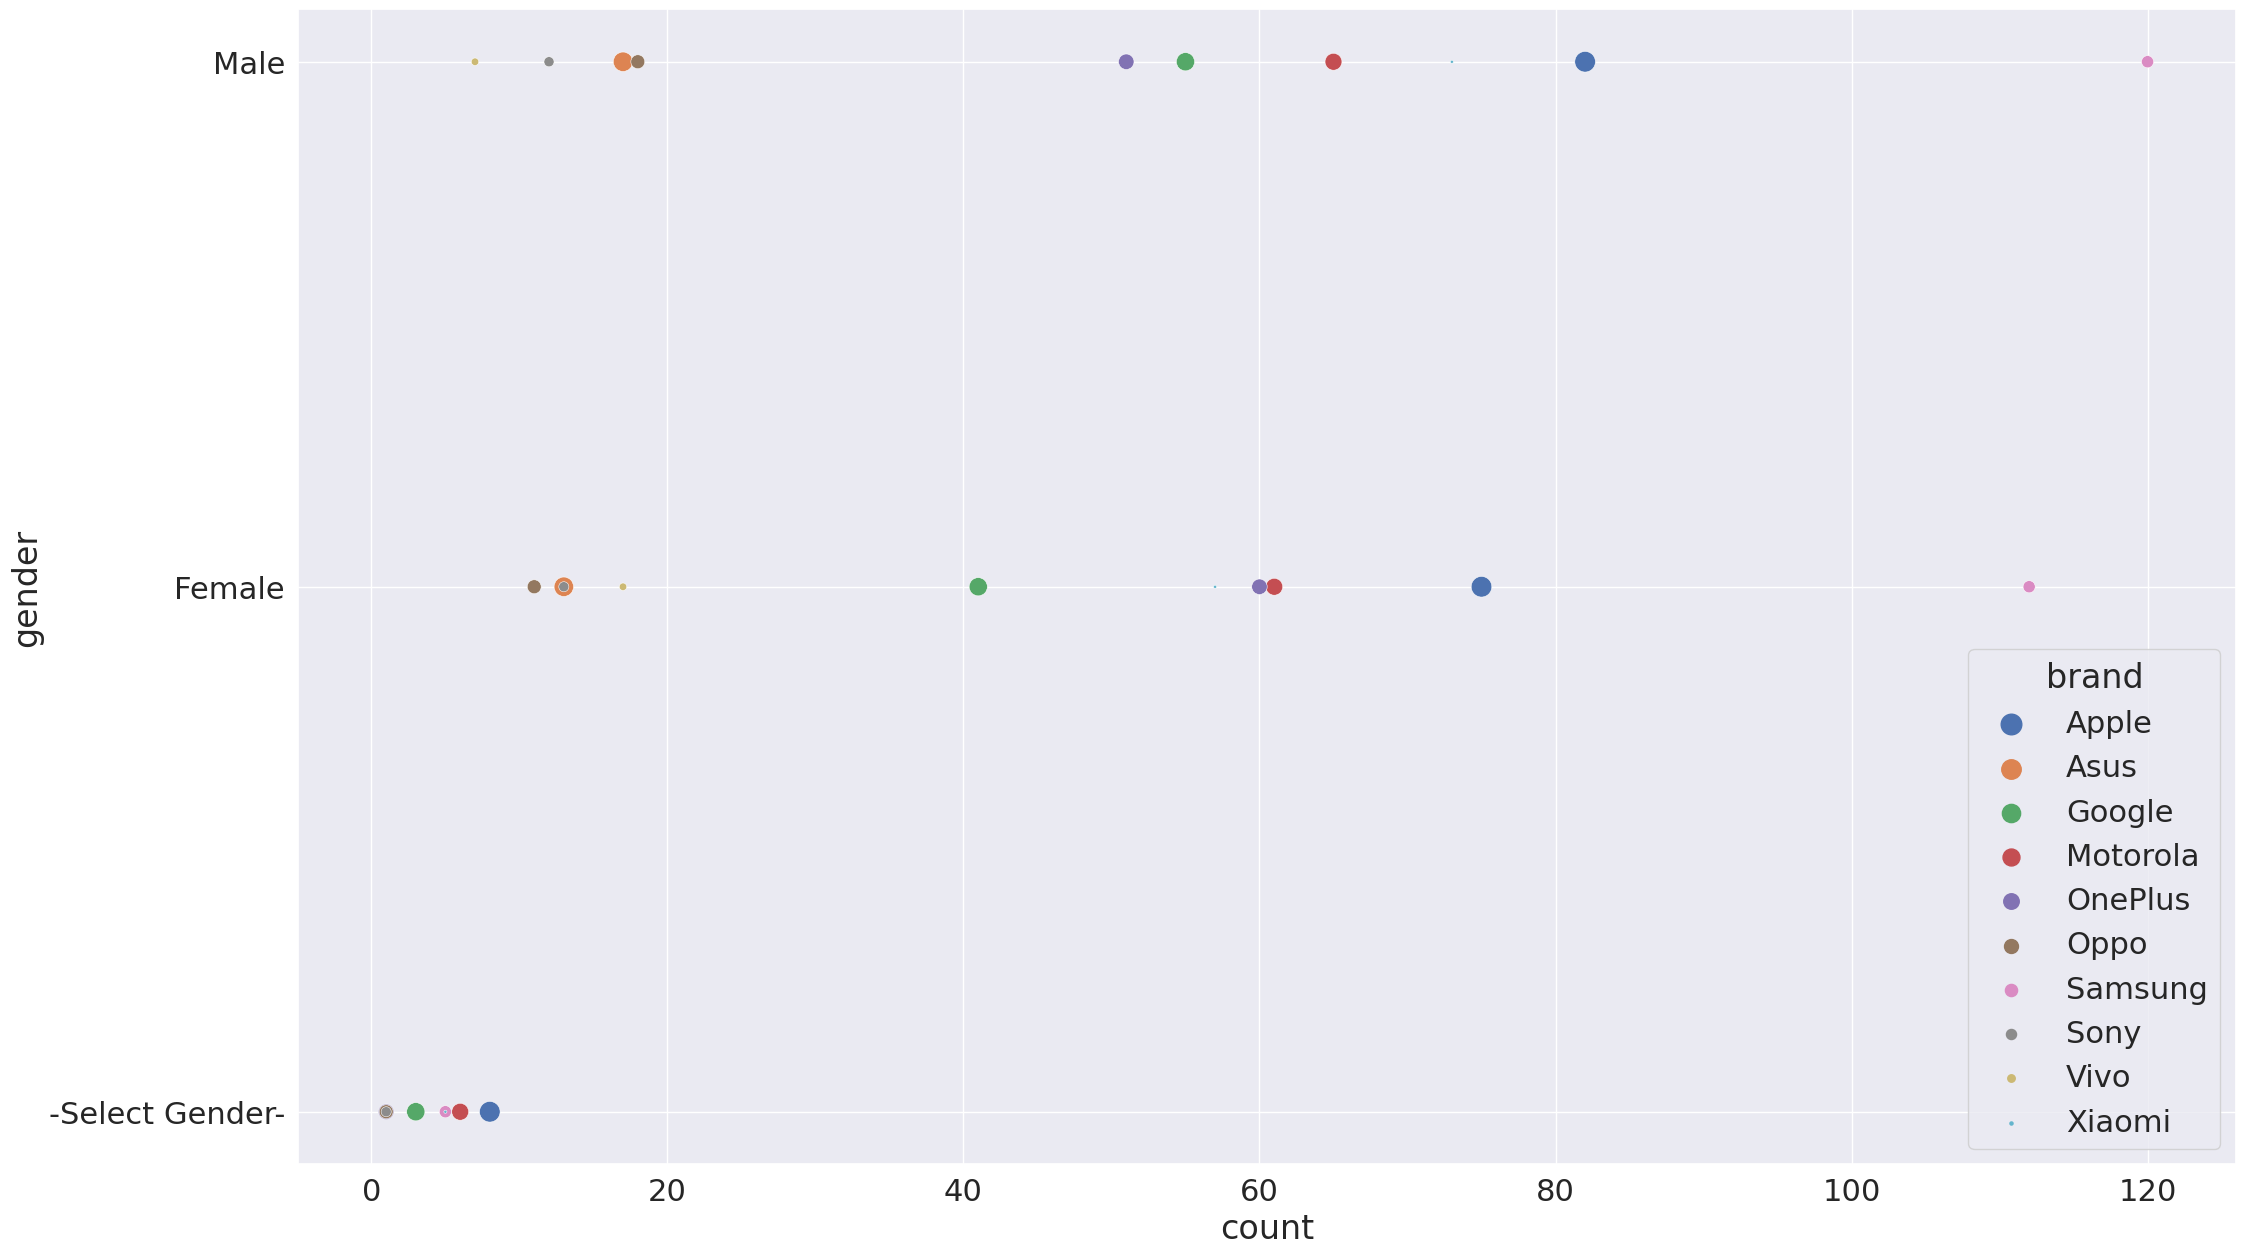

In [6]:
# scatter plot
sns.set(font_scale=2)
sns.color_palette("flare", as_cmap=True)
fig, ax = plt.subplots(figsize=(25, 15), nrows=1, ncols=1)
sns.scatterplot(data=gender_reach, x="count", y="gender", hue="brand", size="brand", sizes=(5, 220), legend="full", ax=ax)

The Samsung brand is preferred by the male and female genders, followed by Apple.

## Qn3: Show the relationship between occupation, brand and price


In [7]:
by_occupation = cellphones.groupby(cellphones["occupation"].str.lower())[["brand", "price"]].value_counts()
print(by_occupation.to_string())

occupation                        brand     price
accountant                        Google    449      2
                                  Xiaomi    174      2
                                  Vivo      872      2
                                  Apple     699      1
                                  Xiaomi    618      1
                                            428      1
                                  Sony      1998     1
                                  Samsung   899      1
                                            528      1
                                            312      1
                                            154      1
                                  OnePlus   780      1
                                  Motorola  189      1
                                            129      1
                                  Google    699      1
                                  Asus      599      1
                                  Apple     1199     1
administrative 

## Qn4: Most desired operating system

In [8]:
by_os = cellphones.groupby("operating system")["operating system"].count()
print(by_os.to_string())

operating system
Android    825
iOS        165


Text(0.5, 1.0, 'Users Choice Of Operating System')

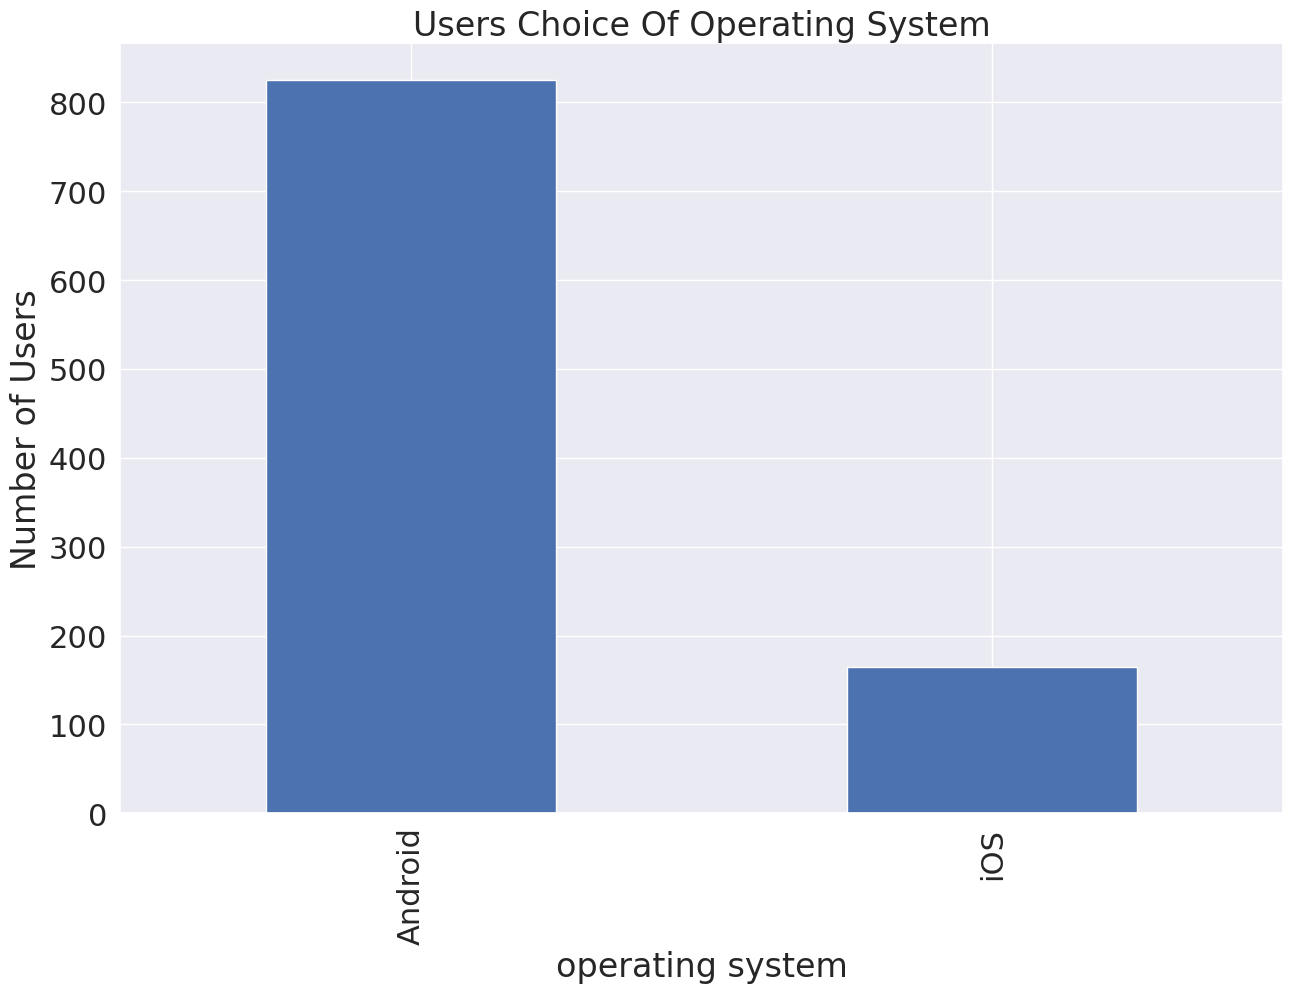

In [9]:
# plot 
fig, ax = plt.subplots(figsize=(15, 10))
by_os.plot(kind="bar")
plt.ylabel("Number of Users")
plt.title("Users Choice Of Operating System")

Android is the most preferred operating system according to the data.

## Qn5: The Brand with the highest customer ratings of 10 points


In [10]:
ratings = cellphones[cellphones["rating"] == 10]
ratings = ratings.groupby("brand")["rating"].count().sort_values(ascending=False).reset_index(name="ten_stars")
print(ratings)

      brand  ten_stars
0     Apple         47
1   Samsung         28
2    Google         12
3  Motorola         11
4   OnePlus         10
5    Xiaomi          7
6      Oppo          6
7      Sony          4
8      Asus          3
9      Vivo          2


Apple received the highest number of customer ratings of 10 stars, even with Samsung having a larger brand ownership.

## Qn6:Relationship between phone price and age


In [11]:
pricing = cellphones.groupby("age").agg(average_price=("price", "mean"))
print(pricing.to_string())

     average_price
age               
21      717.400000
23      832.000000
25      615.891667
27      600.366667
28      562.566667
29      571.920000
30      584.533333
31      450.375000
32      653.860000
33      652.380000
34      622.766667
35      657.766667
36      561.600000
37      651.700000
38      527.880000
39      666.800000
40      642.400000
41      557.300000
42      617.300000
43      443.900000
45      638.900000
46      620.466667
48      597.150000
49      646.850000
50      574.120000
55      439.700000
56      591.250000
57      821.000000
58      488.300000
61      511.950000


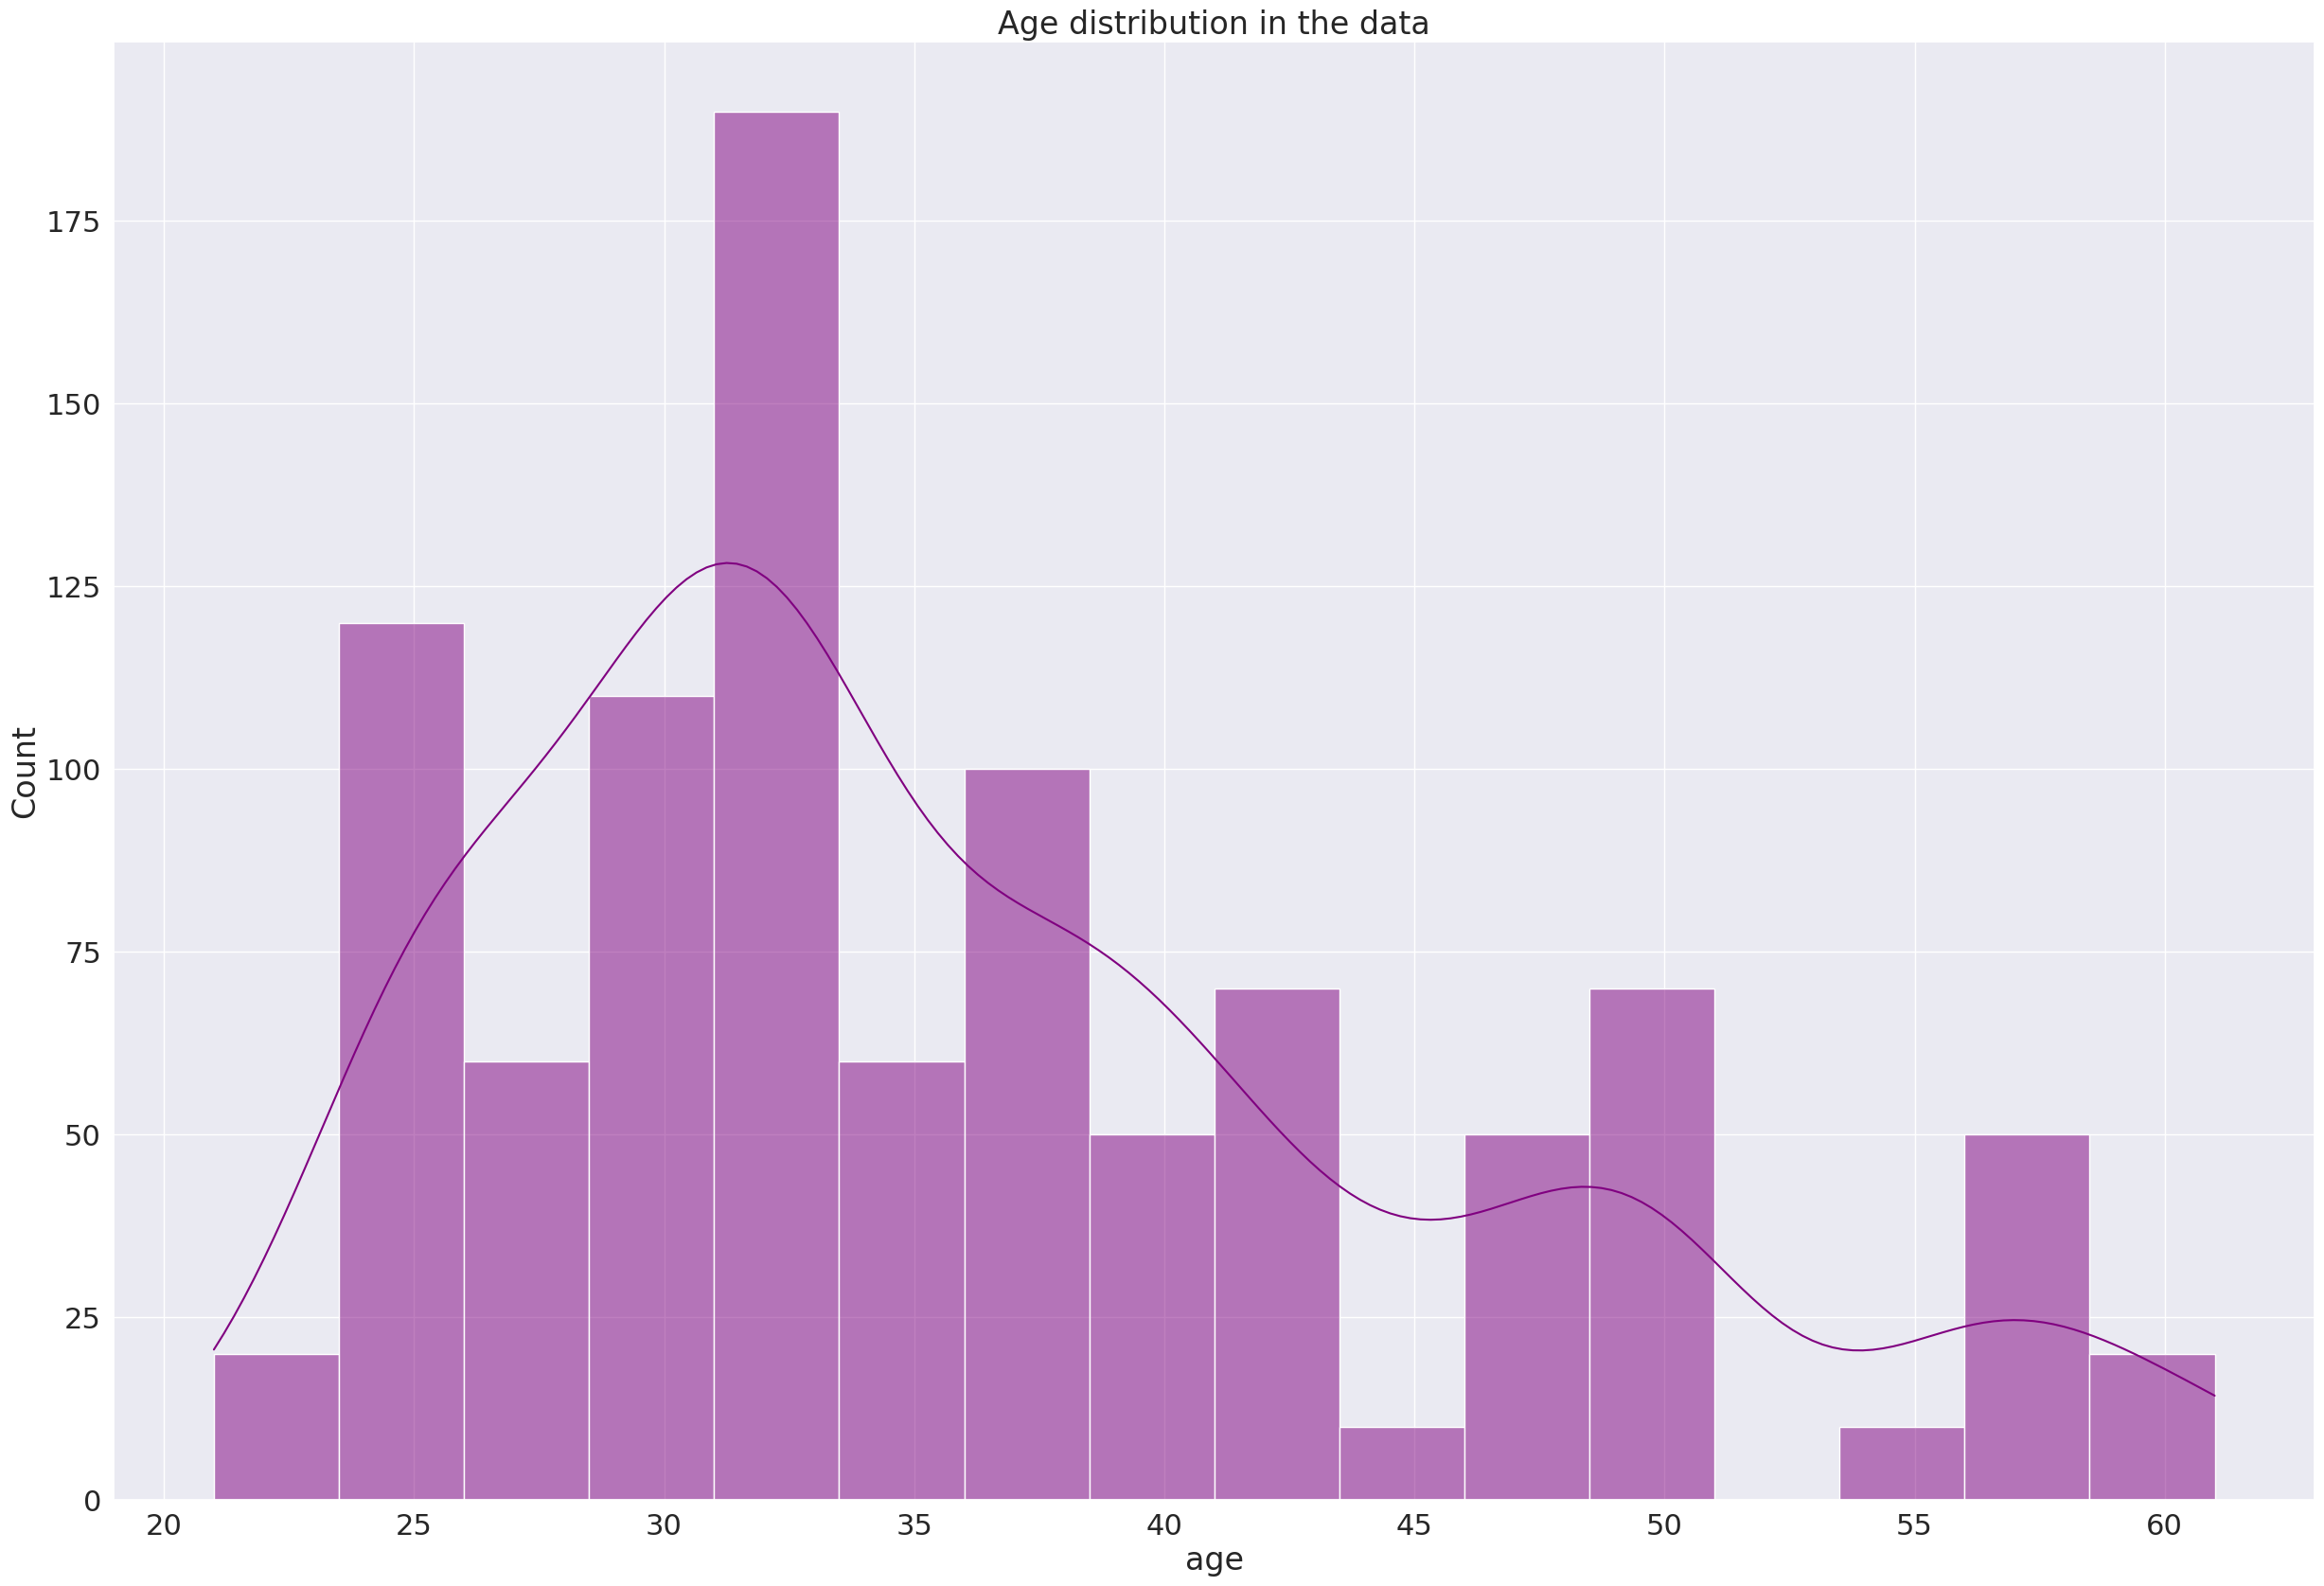

In [12]:
#  plot showing age distribution
fig, ax = plt.subplots(figsize=(30, 20)) 
sns.histplot(cellphones["age"], kde=True, color="purple")
plt.title("Age distribution in the data")
plt.show()

The highest number of respondents, according to the histogram above, were 33 year olds.

Text(0.5, 1.0, 'Age against Average Phone Price')

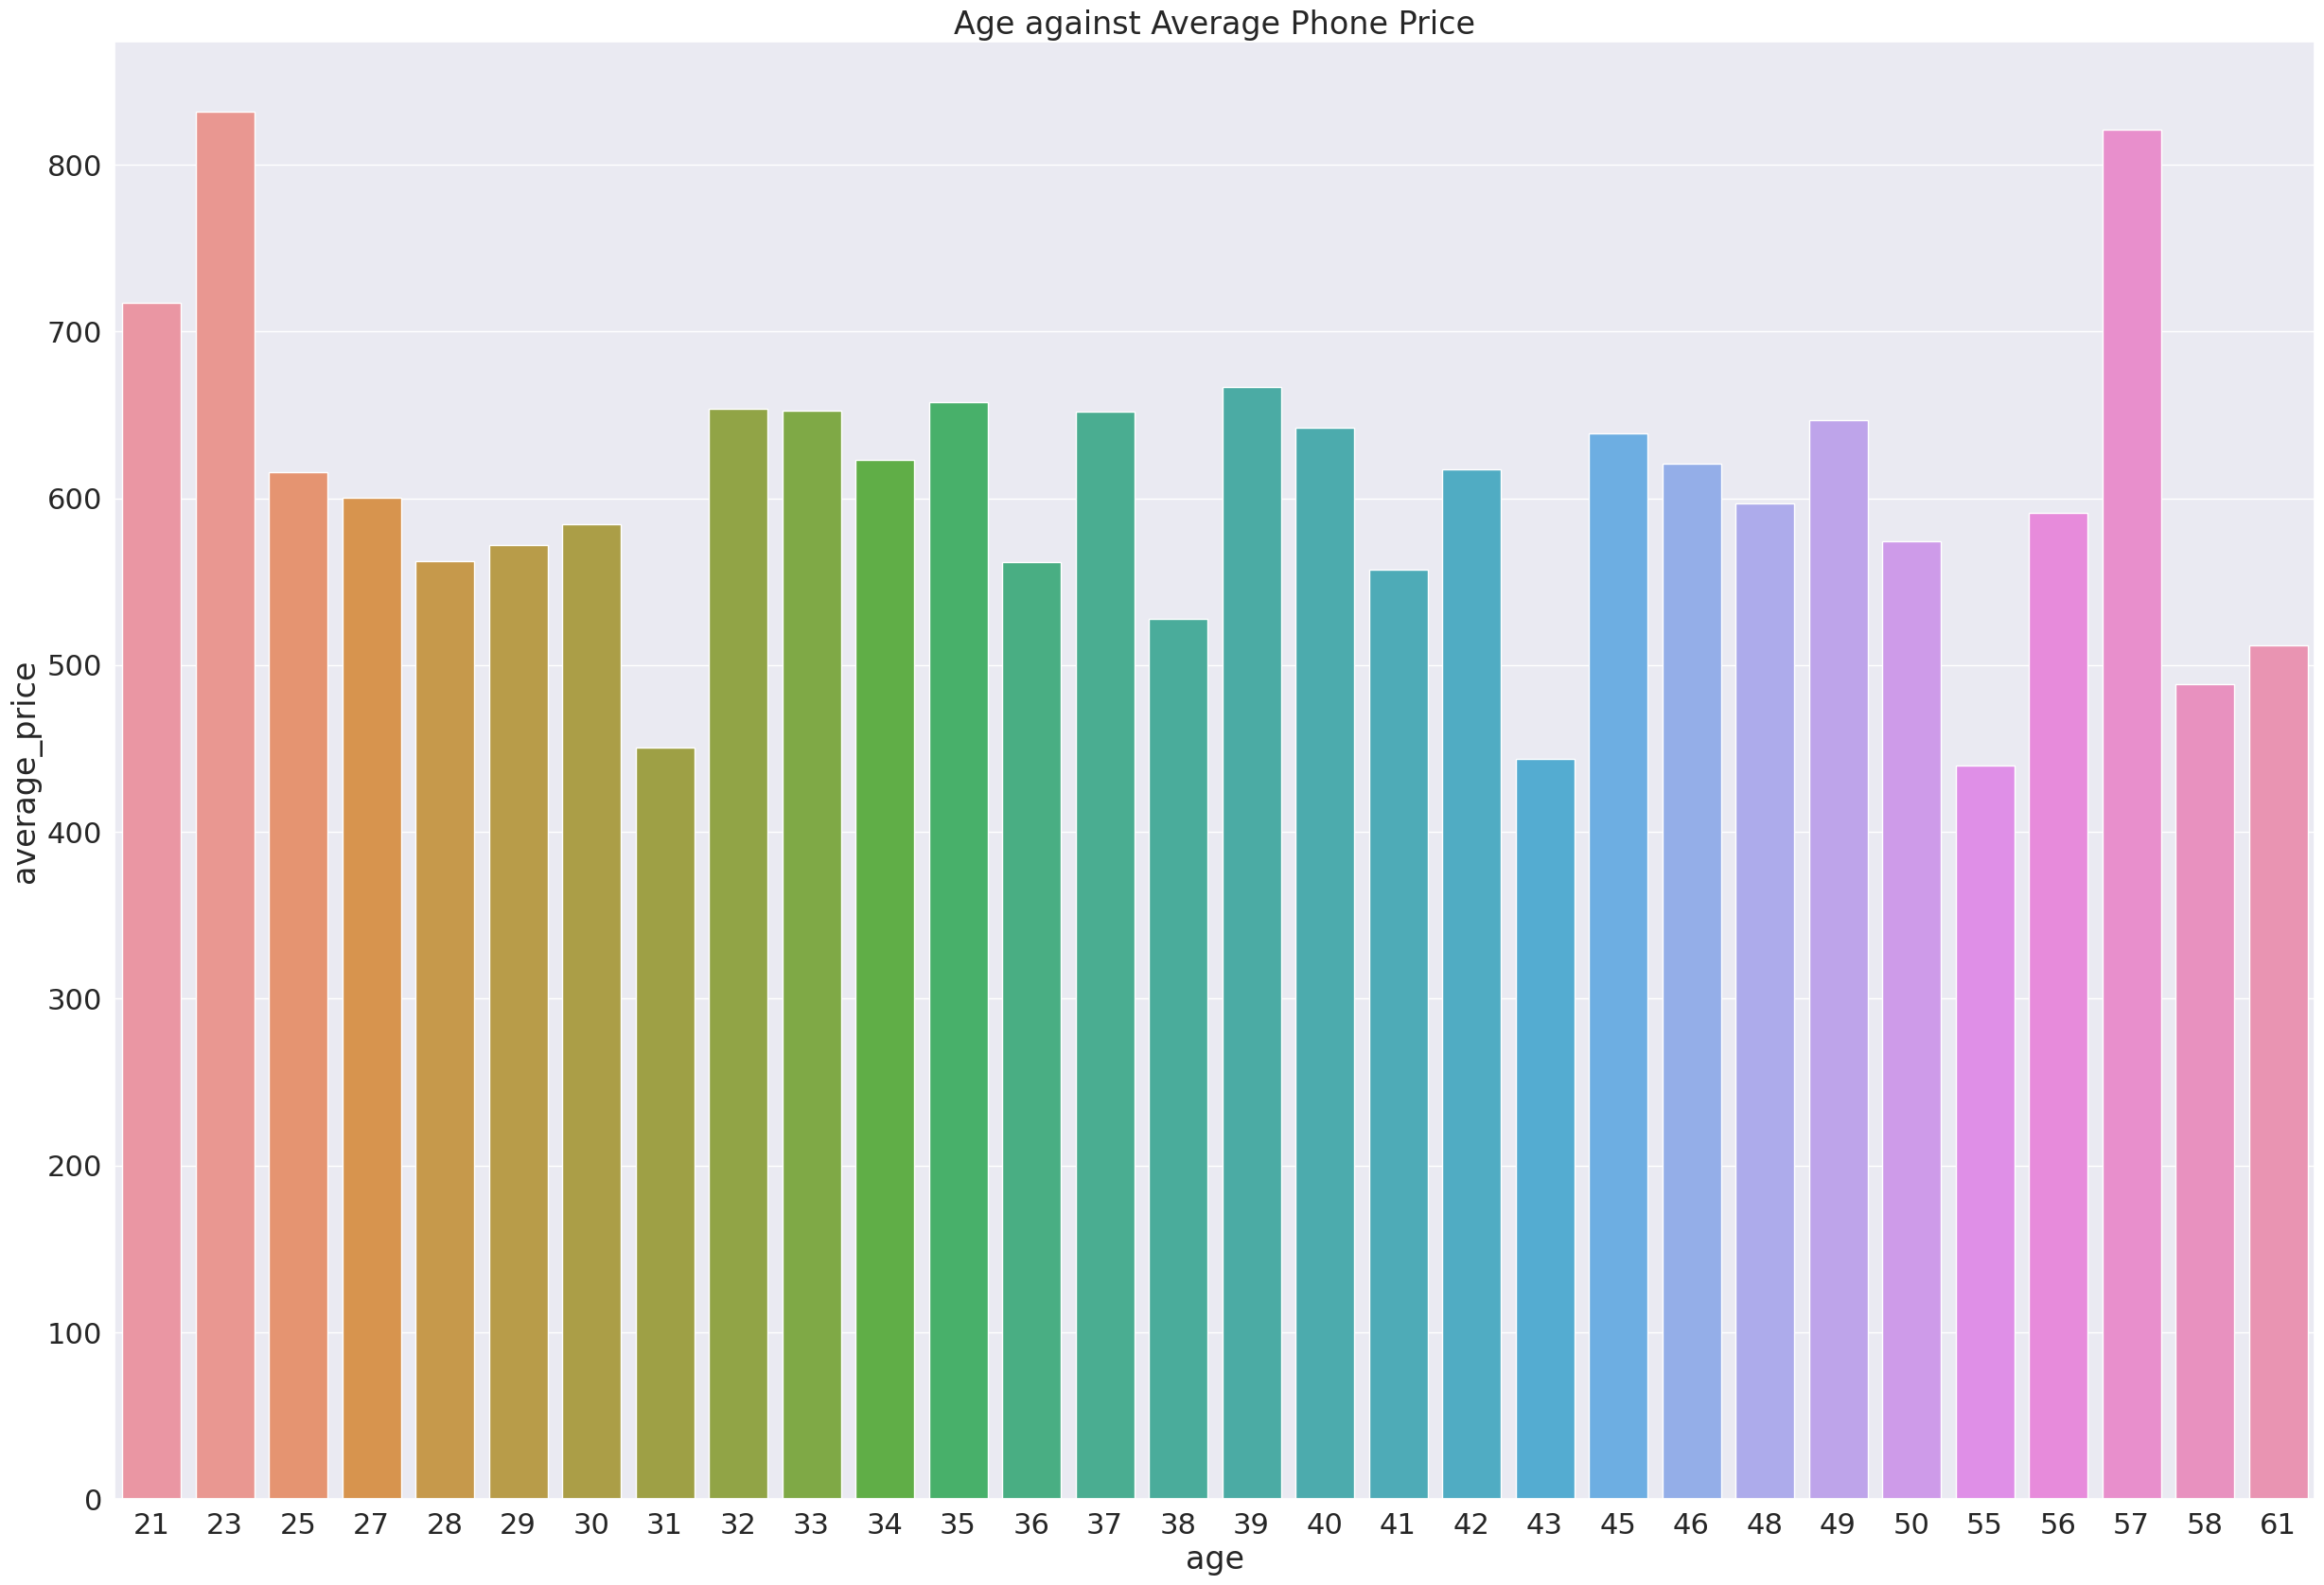

In [13]:
#  plot showing phone price and age
fig, ax = plt.subplots(figsize=(30, 20)) 
sns.barplot(data=pricing, x=pricing.index, y="average_price")
plt.title("Age against Average Phone Price")

According to the above bar chart,23 year olds own the most expensive cell phones followed shortly by 57 year olds,
while 31, 43, and 55 year olds own the low cost cell phones.